# **Beyond Descriptive Stats**

In [1]:
# Libraries

from pandasql import sqldf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Dataframes

df1 = pd.read_csv("athlete_events_file.csv")
df2 = pd.read_csv("noc_regions.csv")

df = pd.merge(df1, df2, on = "NOC")

df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270762,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
270763,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
270764,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
270765,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [3]:
# SQL function

pysqldf = lambda q: sqldf(q, globals())

In [4]:
# Split the dataframes

df_summer = df[df["Season"] == "Summer"]
df_winter = df[df["Season"] == "Winter"]

### **Correlation between age and performance**

Is there a correlation between the age of athletes and their performance in different sports?


#### **Summer**

In [5]:
df_summer.describe()

,ID,Age,Height,Weight,Year
count,222203.000000,213026.000000,170434.000000,168439.000000,222203.000000
mean,67974.554776,25.677776,175.522349,70.697843,1976.294136
std,39133.856272,6.699008,10.916515,14.807120,30.951263
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,33974.000000,21.000000,168.000000,60.000000,1956.000000
50%,68278.000000,24.000000,175.000000,70.000000,1984.000000
75%,101841.000000,28.000000,183.000000,79.000000,2000.000000
max,135568.000000,97.000000,226.000000,214.000000,2016.000000


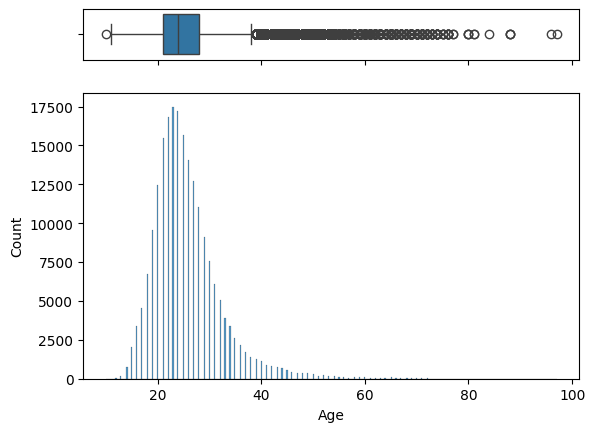

In [6]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df_summer["Age"], orient = "h", ax = ax_box)
sns.histplot(data = df_summer, x = "Age", ax= ax_hist)
plt.show()

In [7]:
bins_s = np.array([10, 20, 30, 40, 50, 60, 100])
group_s = ["10-20", "20-30", "30-40", "40-50", "50-60", "60-100"]

df_summer["Age_binned"] = pd.cut(df_summer["Age"], bins_s, labels = group_s, include_lowest = True )
df_summer.head()

C:\Users\acast\AppData\Local\Temp\ipykernel_18668\1809214311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer["Age_binned"] = pd.cut(df_summer["Age"], bins_s, labels = group_s, include_lowest = True )


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Age_binned
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,20-30
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,20-30
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,20-30
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,30-40
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,10-20


C:\Users\acast\AppData\Local\Temp\ipykernel_18668\3226218485.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heat_summer = df_summer[["Medal", "Age_binned"]].groupby(["Medal", "Age_binned"]).value_counts().reset_index().pivot(index = "Medal", columns = "Age_binned", values = "count")


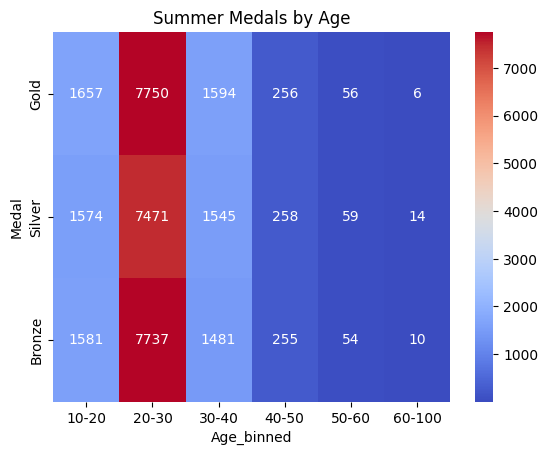

In [8]:
heat_summer = df_summer[["Medal", "Age_binned"]].groupby(["Medal", "Age_binned"]).value_counts().reset_index().pivot(index = "Medal", columns = "Age_binned", values = "count")
heat_summer.index = pd.CategoricalIndex(heat_summer.index, categories = ["Gold", "Silver", "Bronze"])
heat_summer.sort_index(level=0, inplace=True)

sns.heatmap(heat_summer,
            cmap = "coolwarm", 
            annot=True, 
            fmt="0.0f").set(title = "Summer Medals by Age")

plt.show()

#### **Winter**

In [9]:
df_winter.describe()

,ID,Age,Height,Weight,Year
count,48564.00000,48279.000000,40250.000000,39543.000000,48564.000000
mean,69394.74930,25.039147,174.590112,70.759275,1987.825097
std,38462.33521,4.777735,8.598176,12.213273,22.070100
min,5.00000,11.000000,137.000000,32.000000,1924.000000
25%,37280.00000,22.000000,168.000000,62.000000,1972.000000
50%,67798.00000,24.000000,175.000000,70.000000,1994.000000
75%,103279.00000,28.000000,181.000000,79.000000,2006.000000
max,135571.00000,58.000000,211.000000,145.000000,2014.000000


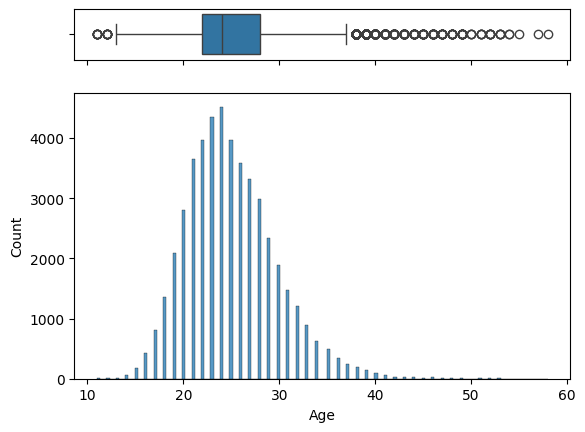

In [10]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df_winter["Age"], orient = "h", ax = ax_box)
sns.histplot(data = df_winter, x = "Age", ax= ax_hist)
plt.show()

In [11]:
bins_w = np.array([10, 20, 30, 40, 50, 60])
group_w = ["10-20", "20-30", "30-40", "40-50", "50-60"]

df_winter["Age_binned"] = pd.cut(df_winter["Age"], bins_w, labels = group_w, include_lowest = True )
df_winter.head()

C:\Users\acast\AppData\Local\Temp\ipykernel_18668\1438543321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winter["Age_binned"] = pd.cut(df_winter["Age"], bins_w, labels = group_w, include_lowest = True )


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Age_binned
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,20-30
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,20-30
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,20-30
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,20-30
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,20-30


C:\Users\acast\AppData\Local\Temp\ipykernel_18668\413905725.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heat_winter = df_winter[["Medal", "Age_binned"]].groupby(["Medal", "Age_binned"]).value_counts().reset_index().pivot(index = "Medal", columns = "Age_binned", values = "count")


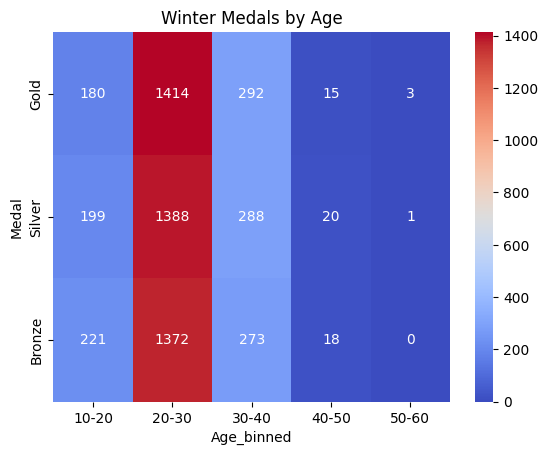

In [12]:
heat_winter = df_winter[["Medal", "Age_binned"]].groupby(["Medal", "Age_binned"]).value_counts().reset_index().pivot(index = "Medal", columns = "Age_binned", values = "count")
heat_winter.index = pd.CategoricalIndex(heat_winter.index, categories = ["Gold", "Silver", "Bronze"])
heat_winter.sort_index(level=0, inplace=True)

sns.heatmap(heat_winter,
            cmap = "coolwarm", 
            annot=True, 
            fmt="0.0f").set(title = "Winter Medals by Age")

plt.show()

- In both Summer and Winter Olympics, athletes aged between 20-30 years tend to win the highest number of medals across all categories.
There's a consistent decline in medal counts as athletes get older, regardless of the type of Olympics (Summer or Winter).
The age distribution seems to have a similar impact on medal performance in both types of Olympics, with athletes in their 20s being the most dominant group.
- There's a consistent decline in medal counts as athletes get older, regardless of the type of Olympics (Summer or Winter).
- The age distribution seems to have a similar impact on medal performance in both types of Olympics, with athletes in their 20s being the most dominant group.


### **Gender disparity in sports participation**

Despite the overall gender ratio of athletes being 3:1, are there specific sports or countries where the gender gap is narrower or wider?


#### **Summer**

In [13]:
df_sex_sport_s = df_summer[["Sport", "Sex"]].groupby(["Sport", "Sex"]).value_counts().reset_index().pivot(index = "Sport", columns = "Sex", values = "count").reset_index().dropna()
df_sex_sport_s["Ratio"] = df_sex_sport_s["M"]/df_sex_sport_s["F"]
df_sex_sport_s.head()

Sex,Sport,F,M,Ratio
1,Alpinism,1.0,3.0,3.000000
2,Archery,1015.0,1319.0,1.299507
3,Art Competitions,377.0,3201.0,8.490716
4,Athletics,11655.0,26941.0,2.311540
5,Badminton,728.0,708.0,0.972527


In [14]:
pysqldf("""
        SELECT *
        FROM df_sex_sport_s
        ORDER BY Ratio DESC
        LIMIT 5
        """)

,Sport,F,M,Ratio
0,Boxing,72.0,5974.0,82.972222
1,Wrestling,304.0,6850.0,22.532895
2,Motorboating,1.0,16.0,16.000000
3,Modern Pentathlon,164.0,1513.0,9.225610
4,Art Competitions,377.0,3201.0,8.490716


In [15]:
pysqldf("""
        SELECT *
        FROM df_sex_sport_s
        ORDER BY Ratio ASC
        LIMIT 5
        """)

,Sport,F,M,Ratio
0,Badminton,728.0,708.0,0.972527
1,Trampolining,76.0,76.0,1.000000
2,Triathlon,263.0,266.0,1.011407
3,Rugby Sevens,148.0,151.0,1.020270
4,Taekwondo,299.0,307.0,1.026756


#### **Winter**

In [16]:
df_sex_sport_w = df_winter[["Sport", "Sex"]].groupby(["Sport", "Sex"]).value_counts().reset_index().pivot(index = "Sport", columns = "Sex", values = "count").reset_index().dropna()
df_sex_sport_w["Ratio"] = df_sex_sport_w["M"]/df_sex_sport_w["F"]
df_sex_sport_w.head()

Sex,Sport,F,M,Ratio
0,Alpine Skiing,3398.0,5431.0,1.598293
2,Biathlon,1863.0,3030.0,1.626409
3,Bobsleigh,143.0,2915.0,20.384615
4,Cross Country Skiing,3385.0,5748.0,1.698080
5,Curling,222.0,241.0,1.085586


In [17]:
pysqldf("""
        SELECT *
        FROM df_sex_sport_w
        ORDER BY Ratio DESC
        LIMIT 5
        """)

,Sport,F,M,Ratio
0,Ski Jumping,30.0,2371.0,79.033333
1,Bobsleigh,143.0,2915.0,20.384615
2,Ice Hockey,754.0,4702.0,6.236074
3,Luge,377.0,1102.0,2.923077
4,Skeleton,66.0,133.0,2.015152


In [18]:
pysqldf("""
        SELECT *
        FROM df_sex_sport_w
        ORDER BY Ratio ASC
        LIMIT 5
        """)

,Sport,F,M,Ratio
0,Figure Skating,1150.0,1094.0,0.951304
1,Short Track Speed Skating,761.0,773.0,1.015769
2,Curling,222.0,241.0,1.085586
3,Freestyle Skiing,433.0,504.0,1.163972
4,Snowboarding,416.0,520.0,1.250000


* In both Summer and Winter Olympics, certain sports exhibit a significant gender disparity, with some heavily favoring male participation (e.g., Boxing, Ski Jumping) and others showing a preference for female participation (e.g., Badminton, Figure Skating).
* However, there are also sports where the gender gap is narrower, with almost equal representation of both genders or with only a slight skew towards one gender (e.g., Trampolining, Triathlon, Curling).
* These variations in gender representation across different sports highlight the complex interplay of factors such as cultural norms, historical participation trends, and athletic requirements specific to each sport.

### **Long-term trends in Olympic performance**

How has the performance of countries in the Olympics evolved over time? Are there any noticeable trends in terms of the rise or decline of certain nations in specific sports or across seasons?

#### **Summer**

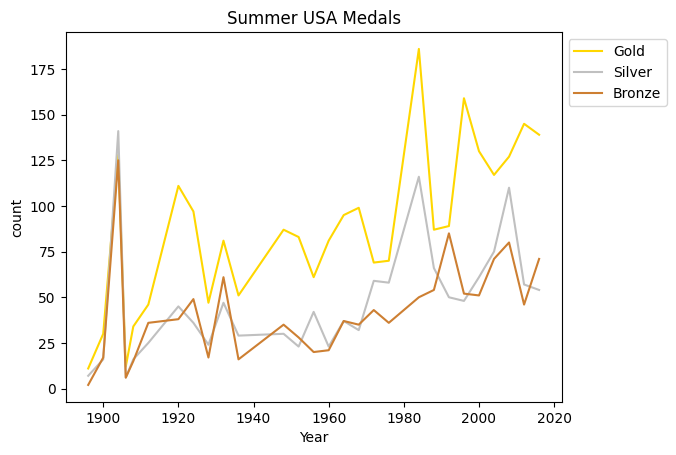

In [19]:
sns.lineplot(data = df_summer[df_summer["region"] == "USA"][["Year", "Medal"]].groupby(["Year"]).value_counts().reset_index(),
             x = "Year",
             y = "count",
             hue = "Medal",
             palette = {"Gold" : "#FFD700", 
                        "Silver" : "#C0C0C0",
                        "Bronze" : "#CD7F32"},
             hue_order = ["Gold", "Silver", "Bronze"]).set_title("Summer USA Medals")

plt.legend(bbox_to_anchor = (1, 1), loc='upper left')
plt.show()

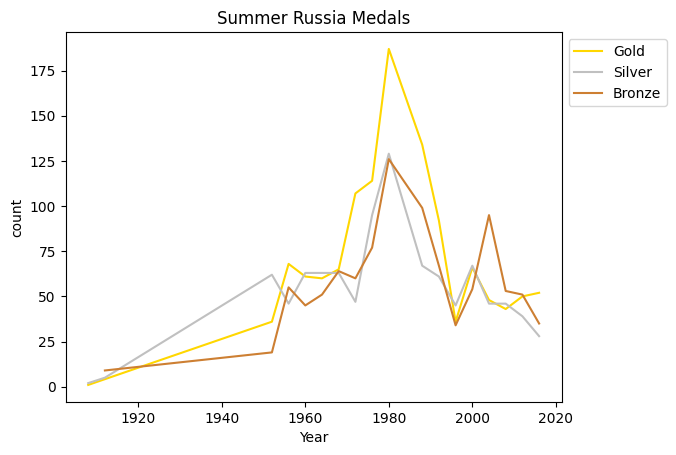

In [20]:
sns.lineplot(data = df_summer[df_summer["region"] == "Russia"][["Year", "Medal"]].groupby(["Year"]).value_counts().reset_index(),
             x = "Year",
             y = "count",
             hue = "Medal",
             palette = {"Gold" : "#FFD700", 
                        "Silver" : "#C0C0C0",
                        "Bronze" : "#CD7F32"},
             hue_order = ["Gold", "Silver", "Bronze"]).set_title("Summer Russia Medals")

plt.legend(bbox_to_anchor = (1, 1), loc='upper left')
plt.show()

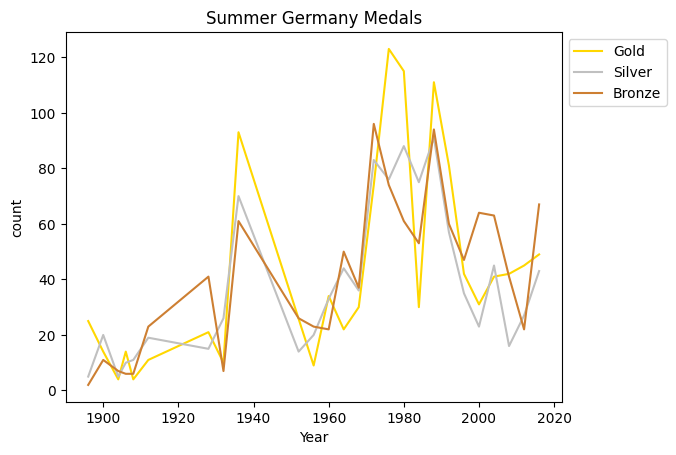

In [21]:
sns.lineplot(data = df_summer[df_summer["region"] == "Germany"][["Year", "Medal"]].groupby(["Year"]).value_counts().reset_index(),
             x = "Year",
             y = "count",
             hue = "Medal",
             palette = {"Gold" : "#FFD700", 
                        "Silver" : "#C0C0C0",
                        "Bronze" : "#CD7F32"},
             hue_order = ["Gold", "Silver", "Bronze"]).set_title("Summer Germany Medals")

plt.legend(bbox_to_anchor = (1, 1), loc='upper left')
plt.show()

#### **Winter**

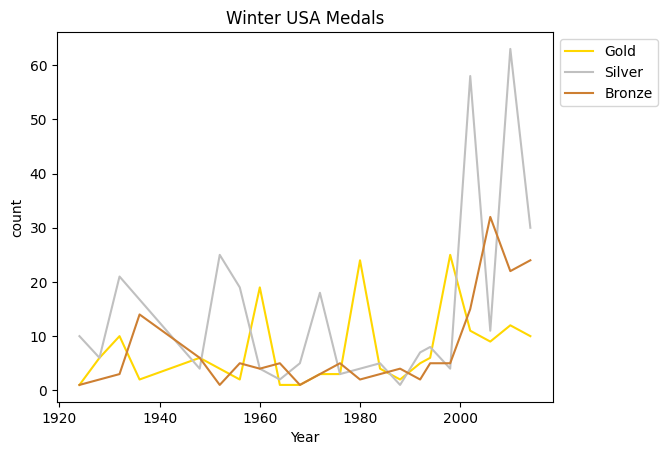

In [22]:
sns.lineplot(data = df_winter[df_winter["region"] == "USA"][["Year", "Medal"]].groupby(["Year"]).value_counts().reset_index(),
             x = "Year",
             y = "count",
             hue = "Medal",
             palette = {"Gold" : "#FFD700", 
                        "Silver" : "#C0C0C0",
                        "Bronze" : "#CD7F32"},
             hue_order = ["Gold", "Silver", "Bronze"]).set_title("Winter USA Medals")

plt.legend(bbox_to_anchor = (1, 1), loc='upper left')
plt.show()

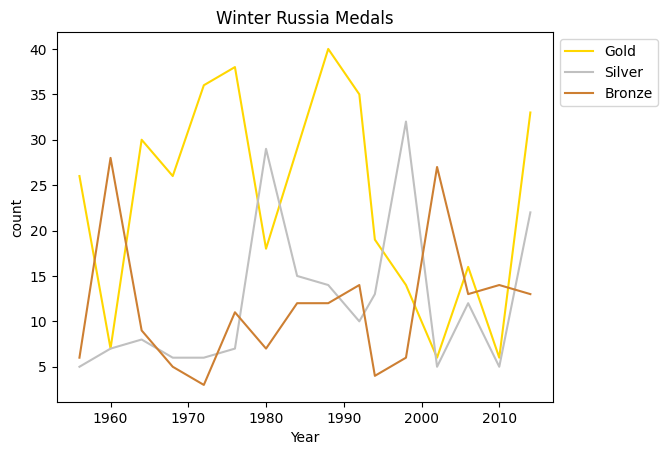

In [23]:
sns.lineplot(data = df_winter[df_winter["region"] == "Russia"][["Year", "Medal"]].groupby(["Year"]).value_counts().reset_index(),
             x = "Year",
             y = "count",
             hue = "Medal",
             palette = {"Gold" : "#FFD700", 
                        "Silver" : "#C0C0C0",
                        "Bronze" : "#CD7F32"},
             hue_order = ["Gold", "Silver", "Bronze"]).set_title("Winter Russia Medals")

plt.legend(bbox_to_anchor = (1, 1), loc='upper left')
plt.show()

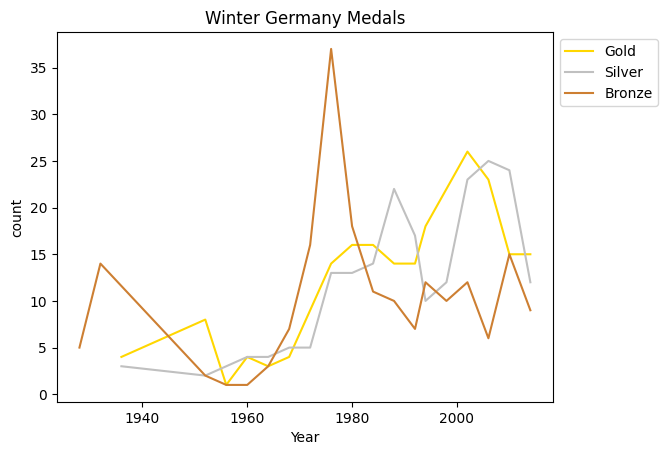

In [24]:
sns.lineplot(data = df_winter[df_winter["region"] == "Germany"][["Year", "Medal"]].groupby(["Year"]).value_counts().reset_index(),
             x = "Year",
             y = "count",
             hue = "Medal",
             palette = {"Gold" : "#FFD700", 
                        "Silver" : "#C0C0C0",
                        "Bronze" : "#CD7F32"},
             hue_order = ["Gold", "Silver", "Bronze"]).set_title("Winter Germany Medals")

plt.legend(bbox_to_anchor = (1, 1), loc='upper left')
plt.show()

During the Summer Olympics, the United States saw remarkable peaks in medal performance in 1904, 1932, and 1984. The 1904 Olympics were held in St. Louis, USA, where American athletes showcased their dominance across various sports. In 1932, Los Angeles, USA, hosted the Olympics, providing American athletes with a home advantage, resulting in a significant medal haul. The peak in 1984 coincides with the Los Angeles Olympics, where Team USA's success was celebrated on home soil, further fueling the nation's sporting pride. Russia's notable peak in medal performance during the Summer Olympics occurred in 1980, when Moscow, Russia, hosted the Games. The strong showing by Soviet athletes on home turf contributed to a memorable Olympic Games for the nation. Germany's exceptional performances in the Summer Olympics, particularly in 1936 and 1972, were highlighted during the Berlin Olympics and the Munich Olympics, respectively, where German athletes excelled in front of their home audiences, showcasing the nation's athletic prowess on the world stage.

- Periods of Excellence: All three countries experienced periods of exceptional performance, indicated by peaks in medal counts. These periods could be associated with various factors, including home advantage.
- Fluctuations: The performance of these countries in specific Olympic seasons may fluctuate due to various factors, including changes in national policies, advancements in sports science and technology, shifts in international sports dynamics, and individual athlete performances.
- Long-Term Success: Despite fluctuations, these countries have demonstrated long-term success in the Olympics, reflecting their commitment to sports excellence and their status as sporting powerhouses on the global stage.